In [1]:
import json
import os
from math import comb
import csv
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import time

%matplotlib inline
pd.options.display.min_rows = 25

In [29]:
questions_detailed_20_21 = pd.read_csv("frameset_questions_detailed_20_21.csv")
questions_detailed_20_21 = questions_detailed_20_21[~(questions_detailed_20_21['n_choices']==0)] #Because some of them has no choice, it's just "True"
questions_detailed_20_21_TF = questions_detailed_20_21[questions_detailed_20_21['question_type']=='T/F'] #The question IDs that are T/F 
TF_frameset_names = questions_detailed_20_21_TF.frameset_name.unique() # Get the name of those framesets
questions_detailed_20_21_TF.columns

Index(['Unnamed: 0', 'frameset_name', 'question_name', 'question_type',
       'n_choices', 'n_solutions'],
      dtype='object')

In [6]:
sessions = pd.read_excel("../Sessions_1D_old_names.xlsx")
sessions.columns

Index(['Unnamed: 0', 'user_id', 'session_number', 'curr_frameset_name',
       'activity_name', 'question_id', 'timestamp'],
      dtype='object')

In [31]:
# Get only framesets that contain T/F questions
sessions_TF = sessions[sessions['curr_frameset_name'].isin(TF_frameset_names)] # All interactions of these sessions (either T/F or not)
session_TF_numbers = sessions_TF.session_number.unique() #Get those session numbers also

In [32]:
sessions_TF.to_csv('sessions_TF.csv')

In [33]:
len(sessions), len(sessions_TF), len(sessions_TF.session_number.unique())

(207490, 113203, 5157)

# Which Framesets/Sessions had more than half of its T/F incorrect at the first attempts?

In [35]:
questions_detailed_20_21_dict = {}
for idx, row in questions_detailed_20_21_TF.iterrows():
    questions_detailed_20_21_dict[row['frameset_name'] + '-' + str(row['question_name'])] = [row['question_type'], row['n_choices'], row['n_solutions']]

In [36]:
session_numbers = sessions_TF['session_number'].unique()
sessions_attributes = []
sessions_attributes_with_user_frameset = []
start = time.time()


for session_number in session_numbers:
    
    # Get Question Numbers that contain T/F only
    session_interactions = sessions_TF[sessions_TF['session_number']==session_number] #Get data of current session number 
    frameset_name = session_interactions.iloc[0]['curr_frameset_name'] # Get the session's frameset name
    question_TF_ids = questions_detailed_20_21_TF[questions_detailed_20_21_TF['frameset_name']==frameset_name].question_name.tolist() #Get ID of questions (questions_detailed_20_21_TF only has the T/F questions)

    user_id = session_interactions.iloc[0]['user_id']
    TF_incorrect = 0 ; TF_correct = 0 ; cnt = 0 
    
    if (frameset_name in ['DFAMinEx1FS', 'DFAMinEx2FS', 'LeftLinearGrammarFF','REtoFAExampleFF','NFAToReExampleFF','CFLPumpingLemmaExample3FF','CFLPumpingLemmaExample5FF',
                         'MajorConceptsFF','GrammarIntroFF','SetDefFF','NFA','MinimizationWithQuestionsFF','MinimizationWithQuestions2FF','RegularExpressionsFF',
                         'RegEXandRegLangFF','RegEXandRegLangORFF','CFLPumpingLemmaExample2FF']):
        continue
    
    if (len(session_interactions)>2):
        for question_id in question_TF_ids:  

            question_interactions =  session_interactions[session_interactions['question_id']==question_id]
            # print(question_interactions)
            if len(question_interactions)!=0 and frameset_name + '-' +  str(question_id) in questions_detailed_20_21_dict:
                # print('-'*30)
                # print(TF_incorrect, TF_correct, frameset_name, question_id, session_number, question_interactions)   
                
                n_incorrect = len(question_interactions[question_interactions['activity_name']=='X'])
                n_correct =  len(question_interactions[question_interactions['activity_name']=='Crrct'])
                    
                if n_incorrect!=0:
                    TF_incorrect+=1
                if n_correct!=0:
                    TF_correct+=1
                cnt+=1
            else:
                continue
                
        # print(TF_incorrect, TF_correct, frameset_name, question_id, session_number)   
        
        # Note that a frameset may have a T/F but maybe not be registered in that frameset asln
        if (TF_incorrect+TF_correct!=0):
            one_row = [TF_incorrect, TF_correct, TF_incorrect/cnt] # The percentage is out of all TF interactions, not by questions

            sessions_attributes.append( one_row )  # Note the current event is a new session, so when you add to attributes, only access the prev iteration values
            sessions_attributes_with_user_frameset.append([user_id, session_number, frameset_name]+ one_row)  # Adding more info to the row

    else:
        continue
        
        
done = time.time()
elapsed = done - start
print("Elapes time:",elapsed)

Elapes time: 65.91589498519897


In [39]:
clusters_attributes = ['user_id','session_number','frameset_name', 'TF_incorrect', 'TF_correct', 'Percentage_Incorrect_TF']

In [40]:
Fine_Grained_Session_TF_Attributes = pd.DataFrame(sessions_attributes_with_user_frameset,columns=clusters_attributes)

Fine_Grained_Session_TF_Attributes.to_csv("Fine_Grained_Session_TF_Attributes.csv")

In [41]:
Fine_Grained_Session_TF_Attributes = Fine_Grained_Session_TF_Attributes.fillna(0)
Fine_Grained_Session_TF_Attributes.columns

Index(['user_id', 'session_number', 'frameset_name', 'TF_incorrect',
       'TF_correct', 'Percentage_Incorrect_TF'],
      dtype='object')

In [42]:
clustered_users = pd.read_csv("../Clustered_Users.csv")
clustered_users.columns

Index(['Unnamed: 0', 'user_id', '# CrSk Sessions', '# CrSk Framesets',
       '# Nrml Sessions', '# Nrml Framesets', '% of CrSk Sessions',
       '% of Nrml Sessions', '% of CrSk Framesets', 'Is CrSk', 'Is CrSk2',
       'OpenDSA ID_x', 'Semester_x', 'Midterm 1_x', 'Midterm 2_x',
       'Final Exam_x', 'Total Homeworks_x', 'Without_x', 'Final Points_x',
       'Final Score_x', 'Total Exams_x', 'Is A_x', 'Letter Grade_x',
       'OpenDSA ID_y', 'Semester_y', 'Midterm 1_y', 'Midterm 2_y',
       'Final Exam_y', 'Total Homeworks_y', 'Without_y', 'Final Points_y',
       'Final Score_y', 'Total Exams_y', 'Is A_y', 'Letter Grade_y'],
      dtype='object')

In [43]:
df = (
    Fine_Grained_Session_TF_Attributes
    .groupby(["user_id"])
    .agg(
        TF_avg=("Percentage_Incorrect_TF",  "mean"),
        TF_Incorrect_avg=("TF_incorrect",  "mean"), #On average, how many he performed T/F incorrect from the first time
    )
)
df.reset_index() 
df = pd.merge(df,clustered_users,left_on='user_id',right_on='user_id',how='inner')

R: 0.4636393576589986
P-value 3.1408147349306054e-08


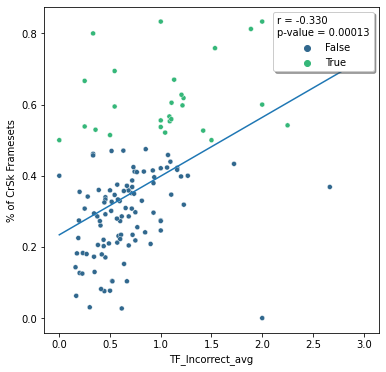

In [52]:
Y = '% of CrSk Framesets' 
X ='TF_Incorrect_avg'

res = stats.linregress(df[X], df[Y])
rvalue, pvalue = stats.pearsonr(x=df[X], y=df[Y])
print(f"R: {res.rvalue}")
print("P-value", pvalue)
fig, axs = plt.subplots(figsize=(6, 6))

sns.scatterplot(data=df, x=X, y=Y, hue= df['Is CrSk2']  , s=25, palette="viridis")
gfg = sns.lineplot(x=df[X], y=res.intercept + res.slope * df[X])

gfg.set(
    # xlabel="Percentage of credit seeking sessions per student",
#     ylabel="Midterm 1 score",
)
plt.legend(loc='upper right',  frameon=True,  shadow=True, title='r = -0.330\np-value = 0.00013')
plt.show()
# fig.savefig("Midterm1-r-20-21.pdf", facecolor="white",dpi=500)

R: 0.5914653260418593
P-value 1.578926845301186e-13


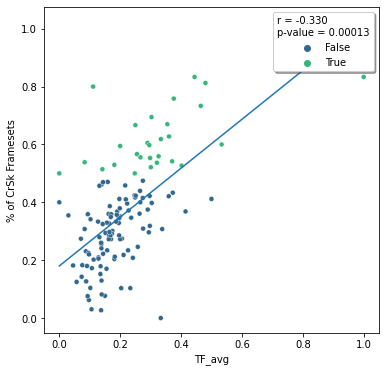

In [51]:
Y = '% of CrSk Framesets' 
X ='TF_avg'

res = stats.linregress(df[X], df[Y])
rvalue, pvalue = stats.pearsonr(x=df[X], y=df[Y])
print(f"R: {res.rvalue}")
print("P-value", pvalue)
fig, axs = plt.subplots(figsize=(6, 6))

sns.scatterplot(data=df, x=X, y=Y, hue= df['Is CrSk2']  , s=25, palette="viridis")
gfg = sns.lineplot(x=df[X], y=res.intercept + res.slope * df[X])

gfg.set(
    # xlabel="Percentage of credit seeking sessions per student",
#     ylabel="Midterm 1 score",
)
plt.legend(loc='upper right',  frameon=True,  shadow=True, title='r = -0.330\np-value = 0.00013')
plt.show()
# fig.savefig("Midterm1-r-20-21.pdf", facecolor="white",dpi=500)

R: 0.4636393576589986
P-value 3.1408147349306054e-08


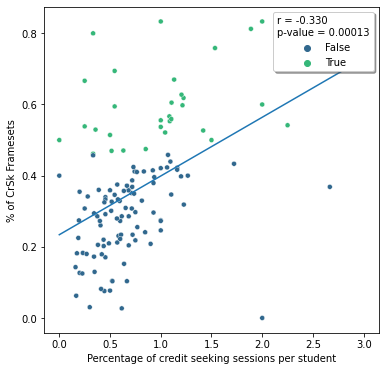

In [50]:
Y = '% of CrSk Framesets' 
X ='TF_Incorrect_avg'

res = stats.linregress(df[X], df[Y])
rvalue, pvalue = stats.pearsonr(x=df[X], y=df[Y])
print(f"R: {res.rvalue}")
print("P-value", pvalue)
fig, axs = plt.subplots(figsize=(6, 6))

sns.scatterplot(data=df, x=X, y=Y, hue= df['Is CrSk']  , s=25, palette="viridis")
gfg = sns.lineplot(x=df[X], y=res.intercept + res.slope * df[X])

gfg.set(
    # xlabel="Percentage of credit seeking sessions per student",
    # ylabel="Midterm 1 score",
)
plt.legend(loc='upper right',  frameon=True,  shadow=True, title='r = -0.330\np-value = 0.00013')
plt.show()
# fig.savefig("Midterm1-r-20-21.pdf", facecolor="white",dpi=500)

In [246]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import silhouette_score

In [279]:
traces_attributes = np.asarray(sessions_attributes)
traces_attributes = np.nan_to_num(traces_attributes)
traces_attributes_standardized = StandardScaler().fit_transform(traces_attributes)
# traces_attributes_centered = StandardScaler(with_std=False).fit_transform(traces_attributes)
traces_attributes_minmax = MinMaxScaler().fit_transform(traces_attributes)

In [280]:
X_embedded = TSNE(n_components=2, init="random").fit_transform(traces_attributes)

C:\Users\Yusuf\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [281]:
X_pca = PCA(n_components=2).fit_transform(traces_attributes_standardized)

In [293]:
# [2,3,4,5,6,7,9] --> The best attributes

kmeans = KMeans(n_clusters=2, random_state=1).fit(X_pca)
y_kmeans = kmeans.predict(X_pca)
silhouette_score(X_pca, y_kmeans)

0.4999274342217214

In [294]:
credit_seeking_len = np.sum(y_kmeans) # 1 is 
normal_len = len(y_kmeans) - credit_seeking_len # 0 is 
credit_seeking_len, normal_len, credit_seeking_len / (credit_seeking_len+normal_len)


(6544, 1511, 0.8124146492861577)

In [304]:
y_kmeans_labels = ["Credit Seeking" if x ==0 else "Normal" for x in y_kmeans]

In [305]:
with open("Clustered_Sessions_fine.csv", "w", newline="") as f:
    writer = csv.writer(f)
    writer.writerow(['cluster'] + clusters_attributes)
    # We may add the trial number to that session as a column + # of moving back 
    writer.writerows(np.concatenate((np.expand_dims(y_kmeans_labels, axis=1), sessions_attributes_with_user_frameset, ), 1,) )


In [306]:
Clustered_Sessions_fine = pd.read_csv("Clustered_Sessions_fine.csv")
# Clustered_Sessions_fine[Clustered_Sessions_fine['cluster']=='Credit Seeking']
Clustered_Sessions_fine

,cluster,user_id,session_number,frameset_name,T/F_credit_seeked,Single_credit_seeked,Multi_credit_seeked,n_normal_TF,n_normal_single_choice,n_normal_multi_choice
0,Normal,812,sesssion 2,LanguagesFS,1.0,1.0,2.0,2,18,7
1,Normal,812,sesssion 3,GrammarIntroFS,0.0,3.0,0.0,0,4,3
2,Normal,812,sesssion 4,GrammarIntroFS,0.0,0.0,4.0,0,6,6
3,Credit Seeking,812,sesssion 5,RelationsFS,3.0,0.0,5.0,1,1,5
4,Normal,812,sesssion 6,EquivFS,0.0,0.0,2.0,1,0,2
5,Normal,812,sesssion 7,DFAintroFS,0.0,1.0,72.0,0,11,1
6,Normal,812,sesssion 8,DFAadvancedFS,0.0,0.0,0.0,0,10,1
7,Normal,812,sesssion 9,NFAFS,0.0,3.0,13.0,0,6,3
8,Normal,812,sesssion 10,NFA2DFAlargeExFS,0.0,0.0,0.0,0,1,15
9,Normal,812,sesssion 11,DFAMinFS,0.0,2.0,3.0,0,9,0


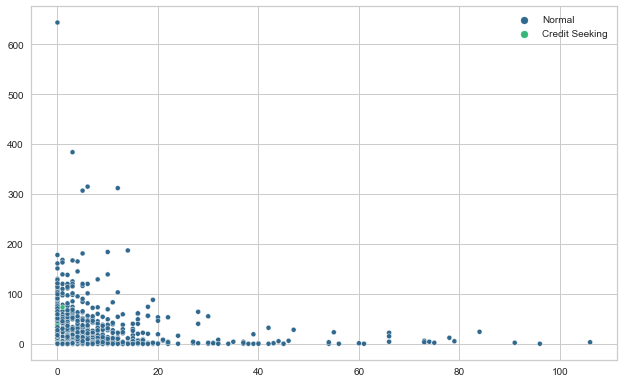

In [298]:
fig, ax = plt.subplots(figsize=(10.5, 6.5))
ax = sns.scatterplot(x=traces_attributes[:, 1], y=traces_attributes[:, 2], hue=y_kmeans_labels, s=25, palette="viridis" )


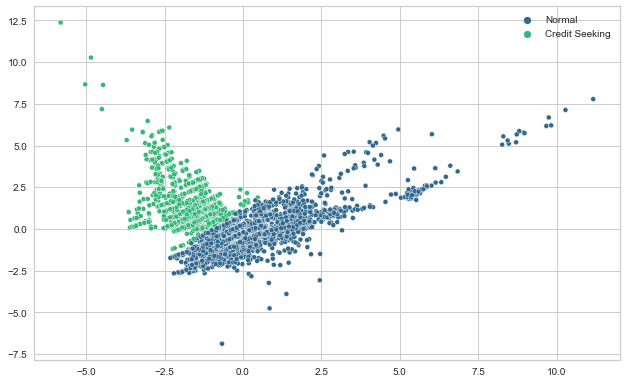

In [299]:
fig, ax = plt.subplots(figsize=(10.5, 6.5))
ax = sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y_kmeans_labels, s=25, palette="viridis" )


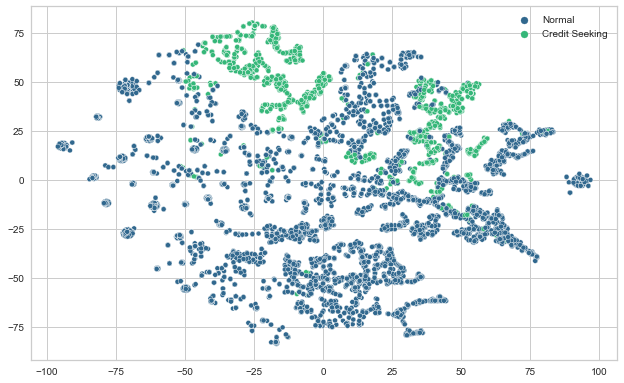

In [300]:
fig, ax = plt.subplots(figsize=(10.5, 6.5))
ax = sns.scatterplot(x=X_embedded[:, 0], y=X_embedded[:, 1], hue=y_kmeans_labels, s=25, palette="viridis" )


# More Analysis

In [128]:
# ["UserID","TraceID","FramesetName" , "WrongFirstTime", "Total Questions", "CorrectFirstTime", "Total T/F"]
sessions_log_TF = pd.DataFrame(
    columns=[
        "UserID",
        "TraceID",
        "FramesetName",
        "WrongFirstTime",
        "Total Questions",
        "CorrectFirstTime",
        "Total T/F",
    ]
)
one_session = []
wrongs_count = 0
correct_count = 0
trace_number = traces.iloc[0][1]
for trace in traces.iterrows():

    # Add the previous results to the df, then after this (if), start getting trace[1][0], trace[1][1], ...
    if (
        trace_number != trace[1][1]
    ):  # Here I am comparing "trace_number" (the old number), with trace[1][1] (the new number
        # Only add this frameset if it happend we have info about it from the book, not only the Database. + this trace had at least one T/F question.
        if (
            frameset_name in Questions_Info.FramesetName.values
            and (wrongs_count + correct_count) != 0
        ):
            total_questions_of_framesets = Framesets_Info[
                Framesets_Info.FramesetName == frameset_name
            ]["n_questions"].values[0]
            total_tf_questions_of_framesets = Framesets_Info[
                Framesets_Info.FramesetName == frameset_name
            ]["T/F"].values[0]
            sessions_log_TF = sessions_log_TF.append(
                {
                    "UserID": user_ID,
                    "TraceID": trace_number,
                    "FramesetName": frameset_name,
                    "WrongFirstTime": wrongs_count,
                    "Total Questions": total_questions_of_framesets,
                    "CorrectFirstTime": correct_count,
                    "Total T/F": total_tf_questions_of_framesets,
                },
                ignore_index=True,
            )
            wrongs_count = 0
            correct_count = 0

    # Updating the info for the second round
    user_ID = trace[1][0]
    trace_number = trace[1][1]
    frameset_name = trace[1][2]
    activity = trace[1][3]
    question_ID = trace[1][4]

    # If the frameset name is in "Questions_Info.csv" + the question number is there for this specific frameset --> Then we can check the type of that question
    if (
        frameset_name in Questions_Info.FramesetName.values
        and question_ID
        in Questions_Info[
            Questions_Info.FramesetName == frameset_name
        ].QuestionNumber.values
    ):
        if (
            Questions_Info[
                (Questions_Info.FramesetName == frameset_name)
                & (Questions_Info.QuestionNumber == question_ID)
            ]["QuestionType"].values[0]
            == "T/F"
        ):
            if activity == "X":
                wrongs_count += 1
            elif activity == "Crrct":
                correct_count += 1
        else:
            continue

In [131]:
sessions_log_TF["Percentage_of_wrong"] = sessions_log_TF["WrongFirstTime"] / (
    sessions_log_TF["WrongFirstTime"] + sessions_log_TF["CorrectFirstTime"]
)

In [181]:
sessions_log_TF["Credit_Seeking"] = sessions_log_TF["Percentage_of_wrong"] >= 0.3

In [183]:
df = sessions_log_TF.groupby(["UserID"], as_index=False).agg(
    Sessions_count_CrSk=("Credit_Seeking", "count"),
)

In [185]:
Coarse_clustered_sessions = pd.read_csv("Coarse-grained_Clustered_Sessions.csv")

In [186]:
matched = 0
not_matched = 0

for session in sessions_log_TF.iterrows():
    is_TF_credit_seeked = session[1][8]
    trace_id = session[1][1]
    if trace_id not in Coarse_clustered_sessions.TraceID.values:
        continue

    is_coarse_credit_seeked = (
        Coarse_clustered_sessions[Coarse_clustered_sessions.TraceID == trace_id][
            "Cluster"
        ].values[0]
        == "Credit Seeking"
    )
    if is_coarse_credit_seeked == is_TF_credit_seeked == 1:
        matched += 1
    else:
        not_matched += 1

In [189]:
print(matched, not_matched)

193 4029


In [187]:
is_coarse_credit_seeked

False

In [190]:
len(sessions_log_TF[sessions_log_TF.Credit_Seeking == 1])

3432

In [153]:
sessions_log_TF.columns

Index(['UserID', 'TraceID', 'FramesetName', 'WrongFirstTime',
       'Total Questions', 'CorrectFirstTime', 'Total T/F',
       'Percentage_of_wrong', 'Credit_Seeking'],
      dtype='object')

In [154]:
Coarse_grained_clustered_sessions.columns

Index(['Cluster', 'UserID', 'TraceID', 'FramesetName', 'is attempted before',
       'is finished before', 'is finished this time',
       '% of consecutive Incorrect',
       'time divided by questions in this session'],
      dtype='object')

In [162]:
Coarse_clustered_sessions[:10]

,Cluster,UserID,TraceID,FramesetName,is attempted before,is finished before,is finished this time,% of consecutive Incorrect,time divided by questions in this session
0,Credit Seeking,56.0,trace 0,LanguagesFS,0,False,False,0.800000,8.414706
1,Credit Seeking,413.0,trace 1,LanguagesFS,0,False,False,0.555556,19.123529
2,Normal,812.0,trace 3,LanguagesFS,0,False,True,0.000000,16.283333
3,Normal,812.0,trace 4,GrammarIntroFS,0,False,True,0.060606,14955.037500
4,Normal,812.0,trace 5,RelationsFS,0,False,True,0.181818,12.009524
5,Normal,812.0,trace 6,EquivFS,0,False,True,0.125000,72.742857
6,Credit Seeking,812.0,trace 7,DFAintroFS,0,False,True,0.797753,6.388636
7,Normal,812.0,trace 8,DFAadvancedFS,0,False,True,0.000000,15.433333
8,Credit Seeking,812.0,trace 9,NFAFS,0,False,True,0.343750,59.490323
9,Normal,812.0,trace 10,NFAequivFS,0,False,True,0.200000,13.300000
